In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("takehome_users.csv",encoding='latin-1',parse_dates=['creation_time'])
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
df1.rename(columns={"object_id" : "user_id"},inplace = True)

In [5]:
df2 = pd.read_csv("takehome_user_engagement.csv",encoding='latin-1', parse_dates=['time_stamp'])
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='time_stamp')['user_id'].count()

In [7]:
df2['seven_day_period'] = df2.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [8]:
df2[df2.seven_day_period >= 3.0]

,time_stamp,user_id,visited,seven_day_period
9,2014-02-09 03:45:04,2,1,3.0
10,2014-02-13 03:45:04,2,1,3.0
27,2013-02-19 22:08:03,10,1,3.0
30,2013-03-02 22:08:03,10,1,3.0
31,2013-03-05 22:08:03,10,1,3.0
...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,6.0
207899,2014-05-24 11:04:47,11988,1,6.0
207900,2014-05-26 11:04:47,11988,1,5.0
207901,2014-05-27 11:04:47,11988,1,5.0


In [9]:
df2 = df2.groupby('user_id')['seven_day_period'].max().reset_index()
df2.head()

,user_id,seven_day_period
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0


In [10]:
df2['adopted_user'] = df2['seven_day_period'].apply(lambda x: 1 if x>=3 else 0)
df2.head()

,user_id,seven_day_period,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


After coding for 'adopted_user' I am left with 1602 users who have logged in on 3 separate days within a seven day period

In [11]:
df2.adopted_user.value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [12]:
df2.drop('seven_day_period', axis = 1, inplace = True)
df2.head()

,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


## Merge

In [13]:
df = df1.merge(df2, on = "user_id", how = "left")
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


Removing columns having personal details and creation time because they dont impact the adopted_user

In [14]:
df = df.drop(['user_id','creation_time', 'name', 'email', 'last_session_creation_time'], axis = 1)

In [15]:
df.isnull().sum()

creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                  3177
dtype: int64

In [16]:
# Filling the NaN values with 0.
df['invited_by_user_id'].fillna(0, inplace=True)
df['adopted_user'].fillna(0, inplace=True)

# Changing float data types into integer
df['invited_by_user_id'] = df['invited_by_user_id'].astype(int)
df['adopted_user'] = df['adopted_user'].astype(int)

# Transforming org_id and invited_by_user_id with binary values
df['org_id'].mask(df['org_id'] > 0, 1, inplace=True)
df['invited_by_user_id'].mask(df['invited_by_user_id'] > 0, 1, inplace=True)

#One-hot encoding
df = pd.get_dummies(df, columns=['creation_source'])

In [17]:
df.isnull().sum()

opted_in_to_mailing_list              0
enabled_for_marketing_drip            0
org_id                                0
invited_by_user_id                    0
adopted_user                          0
creation_source_GUEST_INVITE          0
creation_source_ORG_INVITE            0
creation_source_PERSONAL_PROJECTS     0
creation_source_SIGNUP                0
creation_source_SIGNUP_GOOGLE_AUTH    0
dtype: int64

In [18]:
df.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.249500,0.149333,0.973417,0.534750,0.133500,0.180250,0.354500,0.175917,0.173917,0.115417
std,0.432742,0.356432,0.160869,0.498812,0.340128,0.384412,0.478381,0.380765,0.379054,0.319537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.corr()['adopted_user']

opted_in_to_mailing_list              0.008097
enabled_for_marketing_drip            0.004653
org_id                                0.048111
invited_by_user_id                    0.027671
adopted_user                          1.000000
creation_source_GUEST_INVITE          0.045408
creation_source_ORG_INVITE           -0.007636
creation_source_PERSONAL_PROJECTS    -0.075817
creation_source_SIGNUP                0.009299
creation_source_SIGNUP_GOOGLE_AUTH    0.036119
Name: adopted_user, dtype: float64

# EDA

In [20]:
a = df["adopted_user"].value_counts()
a

0    10398
1     1602
Name: adopted_user, dtype: int64

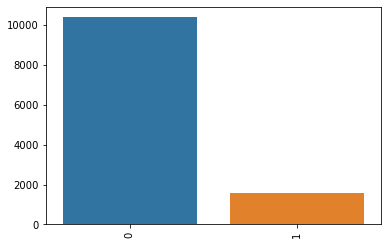

In [21]:
sns.barplot(x=a.index,y=a.values)#barplot
plt.xticks(x=a.index,rotation ='vertical')#axis scale
plt.show()

# Model

In [22]:
X=df[list(pd.Series(df.columns)[pd.Series(df.columns)!='adopted_user'])].values
y = df['adopted_user'].values # target

col_names=list(pd.Series(df.columns)[pd.Series(df.columns)!='adopted_user'])


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=5)
print('Train size:',(len(X_train)/len(X))*100)
print('Train observations:',(len(X_train)))
print('Test size:',(len(X_test)/len(X))*100)
print('Test observations:',(len(X_test)))

Train size: 75.0
Train observations: 9000
Test size: 25.0
Test observations: 3000


Accuracy: 0.8678888888888889 

Feature ranking:


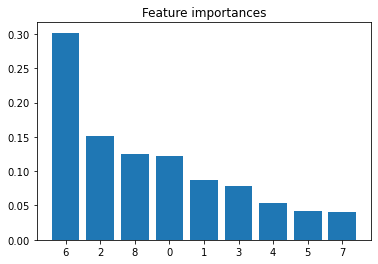

,features,importance
6,creation_source_PERSONAL_PROJECTS,0.301810
2,org_id,0.150945
8,creation_source_SIGNUP_GOOGLE_AUTH,0.124393
0,opted_in_to_mailing_list,0.121615
1,enabled_for_marketing_drip,0.086436
3,invited_by_user_id,0.078660
4,creation_source_GUEST_INVITE,0.053530
5,creation_source_ORG_INVITE,0.041699
7,creation_source_SIGNUP,0.040912


In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20,random_state=5)

clf.fit(X_train, y_train)
Accuracy=clf.score(X_train, y_train)
print('Accuracy:',Accuracy,'\n')

importFeature = clf.feature_importances_
feature_importances=pd.DataFrame([importFeature])

std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importFeature)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Plot the feature importances of the forest
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importFeature[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.show()

feature_importances=pd.DataFrame(pd.Series(col_names)[indices])
feature_importances['importance']=np.sort(importFeature)[::-1]
feature_importances.columns=['features','importance']
feature_importances

The Random Classifier model has produced an accuracy of 86.7 %.

### From the above graph we can conclude that the important features to predict future user adoption are:

- creation_source_PERSONAL_PROJECTS
- org_id
- creation_source_SIGNUP_GOOGLE_AUTH	
- opted_in_to_mailing_list